In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
sys.path.append("../src/utils")
from eda_tools import *
from evaluate_model import *

C:\Users\XA155XB\Anaconda3\envs\walmart2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\XA155XB\Anaconda3\envs\walmart2\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\XA155XB\Anaconda3\envs\walmart2\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


## Reading in Dataset

### Weekly Sales

In [2]:
sales = pd.read_csv("../walmart_sales/train.csv")
sales.head()

,Region,DMZ,Date,Weekly_Sales,IsHoliday,DMZ.1
0,1,1,5/2/2010,24924.50,False,1
1,1,1,12/2/2010,46039.49,True,1
2,1,1,19/2/10,41595.55,False,1
3,1,1,26/2/10,19403.54,False,1
4,1,1,5/3/2010,21827.90,False,1


In [3]:
# Converting dates
sales["Date"] = pd.to_datetime(sales["Date"])

# Dropping DMZ.1 column
sales = sales.drop(["DMZ.1"], axis=1)

sales.head()

,Region,DMZ,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [4]:
missing_data(sales)

,Region,DMZ,Date,Weekly_Sales,IsHoliday
Total,117604,117604,117604,117604,117604
Missing,0,0,0,0,0
Percent Missing(%),0.0,0.0,0.0,0.0,0.0
Types,int64,int64,datetime64[ns],float64,bool


### Weekly Sales by Region

In [5]:
region_sales = pd.read_csv('../walmart_sales/train_region_v2.csv')
# Converting dates
region_sales["Date"] = pd.to_datetime(region_sales["Date"])

In [6]:
region_sales

,Region,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
1711,12,2012-09-28,880415.67
1712,12,2012-10-05,979825.92
1713,12,2012-10-12,934917.47
1714,12,2012-10-19,960945.43


### Store information

In [7]:
store_features = pd.read_csv("../walmart_sales/stores.csv")
store_features.head()

,Region,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Other features

In [8]:
other_features = pd.read_csv("../walmart_sales/features.csv")
# Converting dates
other_features["Date"] = pd.to_datetime(other_features["Date"])

In [9]:
other_features.head()

,Region,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
# Drop MarkDown columns
other_features.drop(["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"], axis=1, inplace=True)

In [11]:
other_features.head()

,Region,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


### Merging

In [12]:
missing_data(region_sales)

,Region,Date,Weekly_Sales
Total,1716,1716,1716
Missing,0,0,0
Percent Missing(%),0.0,0.0,0.0
Types,int64,datetime64[ns],float64


In [13]:
# Merging other features and region sales
temp1 = pd.merge(region_sales, other_features, on=["Region", "Date"], how = "inner")
missing_data(temp1)

,Region,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Total,1716,1716,1716,1716,1716,1716,1716,1716
Missing,0,0,0,0,0,0,0,0
Percent Missing(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,datetime64[ns],float64,float64,float64,float64,float64,bool


In [14]:
# Merging region features
temp2 = pd.merge(temp1, store_features, on=["Region"], how="inner")
missing_data(temp2)

,Region,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
Total,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716
Missing,0,0,0,0,0,0,0,0,0,0
Percent Missing(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,datetime64[ns],float64,float64,float64,float64,float64,bool,object,int64


In [15]:
region = temp2.copy()

In [16]:
region.head()

,Region,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,A,151315


In [18]:
# train_df = pd.DataFrame()
# test_df = pd.DataFrame()

# n = len(region)
# split = 0.2


# for r in pd.unique(region["Region"]):
#     temp = region.loc[region["Region"] == r, ]
#     temp_train = temp.iloc[:-(int(split*len(temp))), :]
#     temp_test = temp.iloc[-(int(split*len(temp))):, :]
#     print(len(temp), len(temp_train), len(temp_test))
#     train_df = pd.concat([train_df, temp_train], axis = 0)
#     test_df = pd.concat([test_df, temp_test], axis = 0)

# train_df.reset_index(drop=True)
# test_df.reset_index(drop=True)

train_df, test_df = train_test_split_timeseries(region, split=0.2, group="Region")


143 115 28
143 115 28
143 115 28
143 115 28
143 115 28
143 115 28
143 115 28
143 115 28
143 115 28
143 115 28
143 115 28
143 115 28


In [19]:
train_df[train_df["Region"] == 1].tail()

,Region,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
110,1,2012-03-16,1677472.78,64.74,3.734,221.211813,7.348,False,A,151315
111,1,2012-03-23,1511068.07,65.93,3.787,221.286413,7.348,False,A,151315
112,1,2012-03-30,1649604.63,67.61,3.845,221.361012,7.348,False,A,151315
113,1,2012-04-06,1899676.88,70.43,3.891,221.435611,7.143,False,A,151315
114,1,2012-04-13,1621031.70,69.07,3.891,221.510210,7.143,False,A,151315


In [20]:
test_df[test_df["Region"]==1].head()

,Region,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
115,1,2012-04-20,1521577.87,66.76,3.877,221.564074,7.143,False,A,151315
116,1,2012-04-27,1468928.37,67.23,3.814,221.617937,7.143,False,A,151315
117,1,2012-05-04,1684519.99,75.55,3.749,221.671800,7.143,False,A,151315
118,1,2012-05-11,1611096.05,73.77,3.688,221.725663,7.143,False,A,151315
119,1,2012-05-18,1595901.87,70.33,3.630,221.742674,7.143,False,A,151315


In [21]:
# # Exporting the data
# train_df.to_csv("../walmart_sales/train_payload2_azureml.csv", index=False)
# test_df.to_csv("../walmart_sales/test_payload2_azureml.csv", index=False)

## Feature Engineering

In [71]:
columns_to_remove = ["Type", "IsHoliday"]

train1 = train_df.drop(columns_to_remove, axis=1)
test1 = test_df.drop(columns_to_remove, axis=1)

In [73]:
# train1["IsHoliday"] = train1["IsHoliday"].apply(lambda x: 1 if x else 0)
# test1["IsHoliday"] = test1["IsHoliday"].apply(lambda x: 1 if x else 0)

In [74]:
train1

,Region,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,151315
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,151315
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,151315
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,151315
...,...,...,...,...,...,...,...,...
1683,12,2012-03-16,1088498.52,64.44,4.273,130.826193,12.187,112238
1684,12,2012-03-23,1045419.87,56.26,4.038,130.896645,12.187,112238
1685,12,2012-03-30,1025382.22,64.36,4.294,130.967097,12.187,112238
1686,12,2012-04-06,1128765.71,64.05,4.121,131.037548,11.627,112238


In [75]:
train = train1
test = test1

## Finetuning

In [161]:
# Python
import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import ParameterGrid

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [ ]:
target = "Weekly_Sales"
time = "Date"
group = ["Region"]

# Time & Target column
train = train.rename(columns = {time: "ds", target:"y"})
test = test.rename(columns = {time: "ds", target:"y"})

In [182]:
param_grid = {  
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0, 10, 20, 30],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0, 20, 30],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0, 20, 30, 40],
}


In [ ]:
# model = Prophet(
#     growth="linear",
#     # changepoint_range=0.69,
#     holidays_prior_scale=0.25, changepoint_prior_scale=0.05, 
#     seasonality_mode = "additive", seasonality_prior_scale= 30,
#     yearly_seasonality="auto",
#     weekly_seasonality="auto",
#     daily_seasonality="auto",
# )

In [183]:
grid = ParameterGrid(param_grid)

df = train[train["Region"] == 1]
rmses = []  # Store the RMSEs for each params here

In [177]:
df_cv = cross_validation(model, initial="700 days", horizon='70 days', parallel="processes")
df_p = performance_metrics(df_cv, rolling_window=1)
# rmses.append(df_p['rmse'].values[0])

INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C8D28C8>


In [178]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,70 days,1.418012e+10,119080.304497,97489.450256,0.056784,0.052022,0.058015,0.8


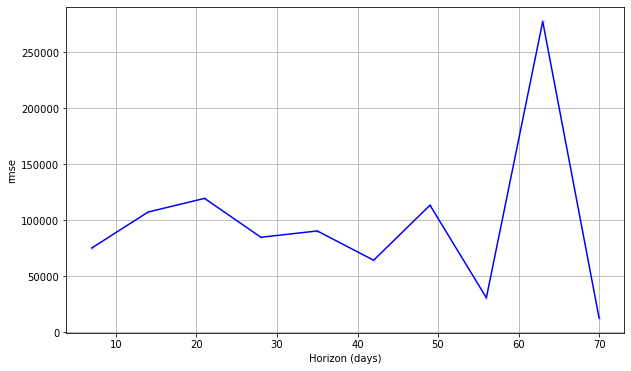

In [179]:
fig = plot_cross_validation_metric(df_cv=df_cv, metric='rmse', rolling_window=0.1)

In [184]:
# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]


# # Use cross validation to evaluate all parameters
# for params in all_params:
#     m = Prophet(**params).fit(df)  # Fit model with given params
#     df_cv = cross_validation(m, cutoffs=cutoffs, horizon='20 weeks', parallel="processes")
#     df_p = performance_metrics(df_cv, rolling_window=1)
#     rmses.append(df_p['rmse'].values[0])

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['rmse'] = rmses
# print(tuning_results)


# Using scikit-learn ParameterGrid
# Use cross validation to evaluate all parameters
for params in grid:
    m = Prophet(**params) # model with given params
    m.add_country_holidays(country_name="US")

    for col in df.drop(["ds", "y"] + group, axis=1).columns:
        print(col)
        m.add_regressor(name=col, standardize='auto', mode='additive')
    
    m.fit(df)  # Fit 
    df_cv = cross_validation(m, initial="700 days", horizon='70 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C8C4B48>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C8BC748>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C9783C8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C97C288>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAB8F88>


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAED148>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C97F888>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C987288>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C979248>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C8E0A08>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAE2588>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C97E248>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C98D948>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAB8F88>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C9872C8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C98F1C8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C976308>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C98DF48>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C970348>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C9915C8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C986488>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C971148>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C986A48>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAED148>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAEA448>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C97DD48>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAE8548>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C9872C8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C9872C8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAE8548>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAC6508>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C97F588>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C8ED088>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C98D408>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAC6508>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C8E0A08>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAC6508>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C8ED088>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C99A248>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C971E48>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C971E48>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C991D08>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C9830C8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C97DC88>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C992AC8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C986C88>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C998508>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C98A808>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C9A1408>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C993948>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C9830C8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C99EB08>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C8ED808>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C998988>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C971E48>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C976308>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81CAED148>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C98FD08>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C980FC8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C9A6808>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C990408>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C971E48>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C989F08>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C994D88>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C973648>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C97D948>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C99EFC8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C97CD08>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C97B508>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C8E0A08>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C991108>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C99E2C8>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C989F08>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C973548>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C98D408>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C994288>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C970D48>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


INFO:prophet:Making 1 forecasts with cutoffs between 2012-02-03 00:00:00 and 2012-02-03 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B81C991588>
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Temperature
Fuel_Price
CPI
Unemployment
Size


In [ ]:
tuning_results = pd.DataFrame(grid)

In [ ]:
# Find the best parameters
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmses
print(tuning_results)

In [ ]:
tuning_results.to_csv("output.csv")

In [ ]:
best_params = grid[np.argmin(rmses)]
print(best_params)

## Prophet training

In [123]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [76]:
target = "Weekly_Sales"
time = "Date"
group = ["Region"]

# Time & Target column
train = train.rename(columns = {time: "ds", target:"y"})
test = test.rename(columns = {time: "ds", target:"y"})

In [110]:
model = Prophet(
    growth="linear",
    changepoint_range=0.69,
    holidays_prior_scale=0.25, changepoint_prior_scale=0.05, 
    seasonality_mode = "additive", seasonality_prior_scale= 30,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
)

In [111]:
model.add_country_holidays(country_name="US")

for col in train.drop(["ds", "y"] + group, axis=1).columns:
    print(col)
    model.add_regressor(name=col, standardize='auto', mode='additive')

Temperature
Fuel_Price
CPI
Unemployment
Size


In [112]:
model.extra_regressors

OrderedDict([('Temperature',
              {'prior_scale': 0.25,
               'standardize': 'auto',
               'mu': 0.0,
               'std': 1.0,
               'mode': 'additive'}),
             ('Fuel_Price',
              {'prior_scale': 0.25,
               'standardize': 'auto',
               'mu': 0.0,
               'std': 1.0,
               'mode': 'additive'}),
             ('CPI',
              {'prior_scale': 0.25,
               'standardize': 'auto',
               'mu': 0.0,
               'std': 1.0,
               'mode': 'additive'}),
             ('Unemployment',
              {'prior_scale': 0.25,
               'standardize': 'auto',
               'mu': 0.0,
               'std': 1.0,
               'mode': 'additive'}),
             ('Size',
              {'prior_scale': 0.25,
               'standardize': 'auto',
               'mu': 0.0,
               'std': 1.0,
               'mode': 'additive'})])

In [113]:
model.fit(train[train["Region"]==1])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [114]:
test

,Region,ds,y,Temperature,Fuel_Price,CPI,Unemployment,Size
115,1,2012-04-20,1521577.87,66.76,3.877,221.564074,7.143,151315
116,1,2012-04-27,1468928.37,67.23,3.814,221.617937,7.143,151315
117,1,2012-05-04,1684519.99,75.55,3.749,221.671800,7.143,151315
118,1,2012-05-11,1611096.05,73.77,3.688,221.725663,7.143,151315
119,1,2012-05-18,1595901.87,70.33,3.630,221.742674,7.143,151315
...,...,...,...,...,...,...,...,...
1711,12,2012-09-28,880415.67,81.22,3.966,131.043000,10.926,112238
1712,12,2012-10-05,979825.92,81.61,3.966,131.075667,10.199,112238
1713,12,2012-10-12,934917.47,71.74,4.468,131.108333,10.199,112238
1714,12,2012-10-19,960945.43,68.66,4.449,131.149968,10.199,112238


In [115]:
# Predicting with model
result = []

forecast = model.predict(df=test.drop(["y"], axis=1))



In [143]:
len(test[test["Region"]==1])

28

In [149]:
forecast2 = model.make_future_dataframe(periods=len(test[test["Region"]==1]))
# forecast2 = model.predict(forecast2)
forecast2

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
138,2012-05-07
139,2012-05-08
140,2012-05-09
141,2012-05-10


In [116]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,CPI,CPI_lower,CPI_upper,Christmas Day,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-04-20,-1.762261e+06,1.527175e+06,1.779576e+06,-1.762261e+06,-1.762261e+06,1.044913e+05,1.044913e+05,1.044913e+05,0.0,...,0.0,0.0,0.0,-33963.593264,-33963.593264,-33963.593264,0.0,0.0,0.0,1.651929e+06
1,2012-04-20,-1.762261e+06,-6.841751e+05,-4.433216e+05,-1.762261e+06,-1.762261e+06,-2.476302e+05,-2.476302e+05,-2.476302e+05,0.0,...,0.0,0.0,0.0,-33963.593264,-33963.593264,-33963.593264,0.0,0.0,0.0,-5.636628e+05
2,2012-04-20,-1.762261e+06,2.793337e+06,3.042680e+06,-1.762261e+06,-1.762261e+06,1.282234e+05,1.282234e+05,1.282234e+05,0.0,...,0.0,0.0,0.0,-33963.593264,-33963.593264,-33963.593264,0.0,0.0,0.0,2.910563e+06
3,2012-04-20,-1.762261e+06,1.233992e+06,1.478079e+06,-1.762261e+06,-1.762261e+06,1.598421e+05,1.598421e+05,1.598421e+05,0.0,...,0.0,0.0,0.0,-33963.593264,-33963.593264,-33963.593264,0.0,0.0,0.0,1.352026e+06
4,2012-04-20,-1.762261e+06,-7.932685e+05,-5.511113e+05,-1.762261e+06,-1.762261e+06,1.131632e+05,1.131632e+05,1.131632e+05,0.0,...,0.0,0.0,0.0,-33963.593264,-33963.593264,-33963.593264,0.0,0.0,0.0,-6.709371e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2012-10-26,-1.796937e+06,-7.940397e+05,-5.430286e+05,-1.796941e+06,-1.796933e+06,1.845898e+05,1.845898e+05,1.845898e+05,0.0,...,0.0,0.0,0.0,-76104.346575,-76104.346575,-76104.346575,0.0,0.0,0.0,-6.586160e+05
332,2012-10-26,-1.796937e+06,2.668166e+06,2.911797e+06,-1.796941e+06,-1.796933e+06,1.268560e+05,1.268560e+05,1.268560e+05,0.0,...,0.0,0.0,0.0,-76104.346575,-76104.346575,-76104.346575,0.0,0.0,0.0,2.788039e+06
333,2012-10-26,-1.796937e+06,1.525701e+06,1.779261e+06,-1.796941e+06,-1.796933e+06,1.322603e+05,1.322603e+05,1.322603e+05,0.0,...,0.0,0.0,0.0,-76104.346575,-76104.346575,-76104.346575,0.0,0.0,0.0,1.655217e+06
334,2012-10-26,-1.796937e+06,2.856832e+06,3.106393e+06,-1.796941e+06,-1.796933e+06,1.845898e+05,1.845898e+05,1.845898e+05,0.0,...,0.0,0.0,0.0,-76104.346575,-76104.346575,-76104.346575,0.0,0.0,0.0,2.977913e+06


## Evaluation

In [117]:
from prophet.utilities import regressor_coefficients

In [118]:
regressor_coefficients(model)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Temperature,additive,66.336174,1160.064367,1160.064367,1160.064367
1,Fuel_Price,additive,3.139365,46593.754510,46593.754510,46593.754510
2,CPI,additive,214.489211,14769.369114,14769.369114,14769.369114
3,Unemployment,additive,7.770617,-117257.932386,-117257.932386,-117257.932386
4,Size,additive,0.000000,21.380623,21.380623,21.380623


In [119]:
pd.concat([train["ds"], test["ds"]]).values

array(['2010-02-05T00:00:00.000000000', '2010-02-12T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', ...,
       '2012-10-12T00:00:00.000000000', '2012-10-19T00:00:00.000000000',
       '2012-10-26T00:00:00.000000000'], dtype='datetime64[ns]')

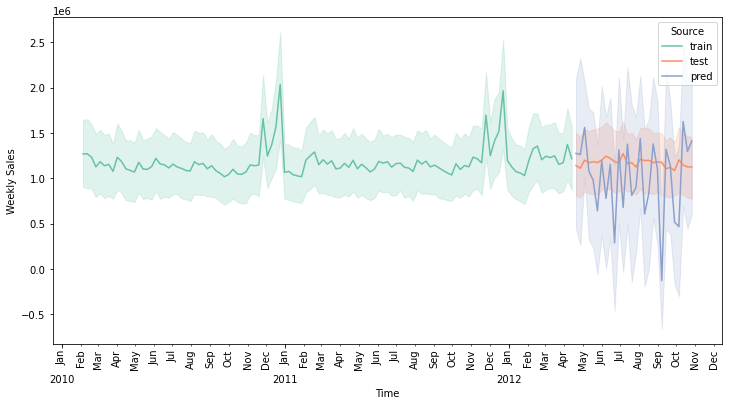

In [120]:
plot_forecast(train["y"].values, forecast["yhat"], test["y"], time=pd.concat([train["ds"], test["ds"]]).values)

In [121]:
forecast["yhat"].apply(lambda x: x<0).sum()

140

In [155]:
y_test = test[test["Region"] == 1]["y"]

In [159]:
y_test = test[test["Region"] == 1]["y"]
y_pred = forecast["yhat"]

print_evaluate_model(y_test, y_pred)

Mean Absolute Error: 1250128.9172542936
Mean Squared Error: 2332430200132.075
Root Mean Squared Error: 1527229.5833083102
Mean Percentage Error: 33.69731461123225
Mean Absolute Percentage Error: 79.95603768596673


## Misc

In [100]:
train, test = train_test_split_timeseries(region, split=0.3, group="Region")

143 101 42
143 101 42
143 101 42
143 101 42
143 101 42
143 101 42
143 101 42
143 101 42
143 101 42
143 101 42
143 101 42
143 101 42


In [101]:
train

,Region,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...
1669,12,2011-12-09,1189646.45,42.17,3.644,129.855533,12.890,False,B,112238
1670,12,2011-12-16,1293404.18,43.29,3.600,129.898065,12.890,False,B,112238
1671,12,2011-12-23,1617612.03,45.40,3.541,129.984548,12.890,False,B,112238
1672,12,2011-12-30,1111638.07,44.64,3.428,130.071032,12.890,True,B,112238
